In [3]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [4]:
digitos = load_digits()
digitos.data # Información para construir imágenes

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
digitos["data"][0] # Array de 64 elementos

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
digitos["data"][0].reshape(8,8) # Mapa de bit de una imagen de 8x8

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

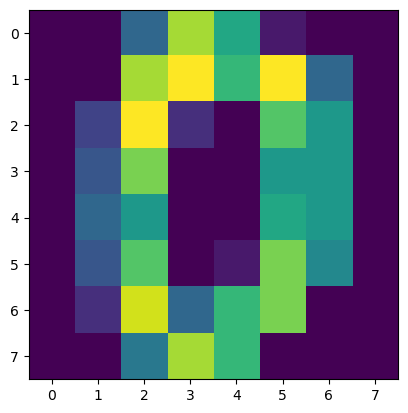

In [7]:
plt.imshow(digitos["data"][0].reshape(8,8))

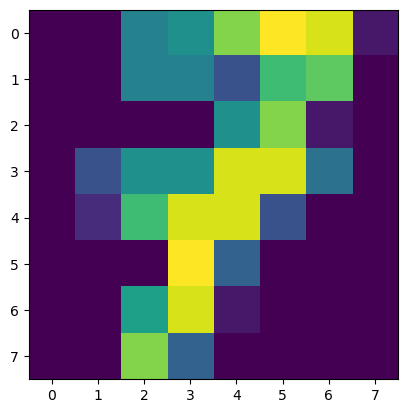

In [8]:
plt.imshow(digitos.images[7])

## Aplicar Autoencoders

### 1. Extraer los datos

In [14]:
X = digitos.data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

### 2. Normalizar los datos

In [15]:
X = X / 16.0
X

array([[0.    , 0.    , 0.3125, ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.625 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 1.    , 0.5625, 0.    ],
       ...,
       [0.    , 0.    , 0.0625, ..., 0.375 , 0.    , 0.    ],
       [0.    , 0.    , 0.125 , ..., 0.75  , 0.    , 0.    ],
       [0.    , 0.    , 0.625 , ..., 0.75  , 0.0625, 0.    ]])

### 3. Dividir los datos

In [16]:
X_entrana, X_prueba = train_test_split(X, test_size=0.2, random_state=42)

### 4. Preparación de los datos

- Variable con al funcion input de keras, para instanciar una nueva capa de entrada (capa tensorial)
- Forma específica que el modelo va a esperar que tengan nuestros datos.

In [17]:
imagen_entrada = Input(shape=(64,)) 

### 5. Creación del codificador y decodificador

- Capa densa: Capa que va a contener muchos puntos de informacion, y todos esos puntos van a estar conectados entre si como una red de neuronas, donde cada neurona tiene una conexión directa con cada una de las demás neuronas. En este caso 64 puntos de información donde todos se conectan con todos.
- 32: número de nodos, neuronas que van a tener la red y que se van a conectar todas entre si. 
  - Muchas neuronas: Mejor para que el modelo aprenda incluso detalles finos, pero puedo también aprender hasta el ruido de las datos.
  - Pocas neuronas: Podría no tener la capacidad de aprender los patrones de los datos. Sería un modelo muy simple.
- "relu": Función de activación.
- imagen_entrada: Indicando a dense que la capa densa que hemos definido debe aplicarse a las entradas que proporcionaremos por imagen entrada.

- Capa codificado: Cada capa densa representa una neurona o un punto donde puede ocurrir algo en el mensaje.
- Cada neurona recibe el mensaje o dato de entrada y cada uno lo modifica un poco basado en sus propias reglas antes de pasarlo. Y debido a que en una capa densa cada neurona está conectada a todas las entradas, cada conexión puede pensar el mensaje de manera diferente.

In [18]:
codificado = Dense(32, activation="relu")(imagen_entrada)

- 64 nodos, igual a los puntos de entrada originales.
- "sigmoid": Función de activación.
- Se aplique a la salida de la capa de codificado

In [19]:
decodificado = Dense(64, activation="sigmoid")(codificado)

### 6. Crear el Autoencoder

In [20]:
autoencoder = Model(imagen_entrada, decodificado)

- Optimizer: Función de optimización, algoritmo que ajusta los pesos del modelo.
- Loss: Mide que tan bien el modelo está haciendo su trabajo.

In [21]:
autoencoder.compile(optimizer="adam", loss="binary_crossentropy") # Prepara el modelo para el entrenamiento

In [22]:
autoencoder.fit(
    X_entrana, 
    X_entrana, # Mismo conjunto de entrenamiento porque el objetivo es reconstruir las imagenes
    epochs=200, # Número de veces que va a repasar el conjunto de entranamiento
    batch_size=256, # Debe tonar 256 ejemplos de X_entrena a la vez, procesarlos, actualizar su peso y luego pasar al siguiente lote de 256 ejemplos más
    shuffle=True, # Orden aleatorio de los ejemplos
    validation_data=(X_prueba, X_prueba) # Conjunto de prueba
)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.6984 - val_loss: 0.6825
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.6779 - val_loss: 0.6620
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6570 - val_loss: 0.6396
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6331 - val_loss: 0.6138
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.6070 - val_loss: 0.5843
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5757 - val_loss: 0.5522
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.5435 - val_loss: 0.5203
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5132 - val_loss: 0.4915
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4840 - val_loss: 0.4681
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4630 - val_loss: 0.4502
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4472 - val_loss: 0.4370
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.4336 - val_lo

### 7. Visualizar los resultados

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


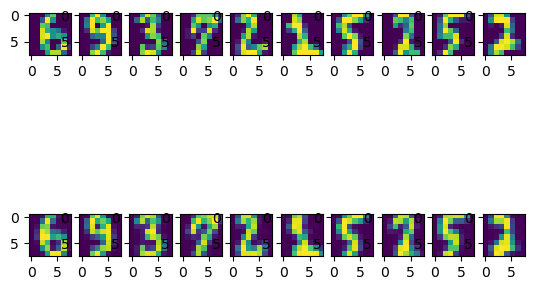

In [24]:
for i in range(10):
    plt.subplot(
        2, 
        10, 
        i+1
    )
    plt.imshow(X_prueba[i].reshape(8,8))

    plt.subplot(
        2, 
        10,  
        i+1 + 10
    )
    plt.imshow(autoencoder.predict(X_prueba)[i].reshape(8,8))    
plt.show()

# Autoencoders con el dataset 'digits'

## 🧠 ¿Qué es un Autoencoder?
Un **Autoencoder** es una red neuronal no supervisada utilizada para aprender una representación (codificación) eficiente de los datos. Su objetivo es **reconstruir la entrada** a partir de una versión comprimida.

---

## 🔁 Resumen de pasos del cuaderno

1. **Carga de datos**
   - Se usa el dataset `digits` de sklearn, que contiene imágenes 8x8 de dígitos (convertidas a vectores de 64 valores).

2. **Visualización inicial**
   - Se muestran imágenes con `plt.imshow()` para entender cómo se ven los datos.

3. **Normalización**
   ```python
   X = X / 16.0
   ```
   - Escala los valores entre 0 y 1 para mejorar el entrenamiento.

4. **Separación del conjunto de datos**
   ```python
   train_test_split(X, test_size=0.2)
   ```
   - 80% entrenamiento / 20% prueba.

5. **Definición de la arquitectura del Autoencoder**
   ```python
   imagen_entrada = Input(shape=(64,))
   codificado = Dense(32, activation="relu")(imagen_entrada)
   decodificado = Dense(64, activation="sigmoid")(codificado)
   autoencoder = Model(imagen_entrada, decodificado)
   ```

6. **Compilación del modelo**
   ```python
   autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
   ```
   - Optimización con Adam.
   - Función de pérdida: entropía cruzada binaria.

7. **Entrenamiento del modelo**
   ```python
   autoencoder.fit(X_entrena, X_entrena, epochs=100, batch_size=256, shuffle=True, validation_data=(X_prueba, X_prueba))
   ```
   - Se entrena para que el modelo aprenda a reconstruir la misma entrada.

8. **Visualización de resultados**
   - Se muestran 10 imágenes originales y sus versiones reconstruidas para comparar.

---

## ⚙️ Explicación de parámetros clave

- `Input(shape=(64,))`: capa de entrada con 64 neuronas (una por pixel).
- `Dense(32, activation="relu")`: codificador con 32 neuronas y activación ReLU.
- `Dense(64, activation="sigmoid")`: decodificador para reconstruir la imagen original con salida entre 0 y 1.
- `optimizer="adam"`: algoritmo eficiente de optimización.
- `loss="binary_crossentropy"`: mide el error en la reconstrucción de imágenes binarias.
- `epochs=100`: número de pasadas completas por los datos.
- `batch_size=256`: tamaño del lote de entrenamiento.
- `shuffle=True`: mezcla los datos en cada época para mejorar generalización.

---

## ✅ Conclusiones

- El autoencoder logró **aprender una representación comprimida** (32 valores) de imágenes de 64 píxeles.
- Las imágenes reconstruidas conservan las formas generales del dígito original, mostrando la **capacidad del modelo para extraer patrones relevantes**.
- La arquitectura es útil para compresión, detección de anomalías y preprocesamiento.
- Normalizar los datos entre 0 y 1 fue **clave para evitar problemas numéricos** durante el entrenamiento.

---